<a href="https://colab.research.google.com/github/rlcirino/PUC_Ci-nciaDados/blob/main/PUCRIO_MVP2_RubensLCirino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEFINIÇÃO DO PROBLEMA

O dataset usado neste projeto será o Wholesale customers, proveniente do UCI Machine Learning Repository. O presente dataset é um subset de uma base de dados maior referida em Abreu, N. (2011). “Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional” – Mestrado em Marketing , ISCTE-IUL, Lisboa. Seu objetivo é mostrar o volume anual de vendas de um comércio atacadista, expresso em unidades monetárias, de diversas categorias de produtos. Para mais detalhes sobre o dataset, consulte: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers# Informações sobre os atributos:

Canal de Venda – qual o tipo de canal de venda foi usado para a compra: a. Horeca (Hotel/Restaurante/Café) – pessoa jurídica b. Varejo – pessoa física;
Região: a. Lisboa b. Porto c. Outra Região;
Produtos frescos – são as vendas anuais em unidades de dinheiro com produtos frescos;
Laticínios – são as vendas anuais em unidades de dinheiro de laticínios;
Produtos de mercado – são as vendas anuais em unidades de dinheiro de produtos de mercado;
Congelados – são as vendas anuais em unidades de dinheiro de congelados;
Higiene e Limpeza – são as vendas anuais em unidades de dinheiro em produtos de higiene e limpeza;
Delicatessen – são as vendas anuais em unidades de dinheiro de produtos classificados como delicatessen;

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Inicialmente, vamos fazer a importação das bibliotecas que usaremos no nosso código Python
# importação do Pandas
import pandas as pd
import numpy as np
# importação do pyplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.svm import SVR # algoritmo SVM

from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.model_selection import StratifiedKFold # fornece índices de treino/teste
from sklearn.model_selection import GridSearchCV # Pesquisa exaustiva sobre valores de parâmetros especificados para um estimador.
from sklearn.pipeline import Pipeline # meta estimador
from sklearn.linear_model import LogisticRegression # regressão logística
from sklearn.ensemble import BaggingClassifier   # Classificador Bagging
from sklearn.ensemble import RandomForestClassifier # classificador random forest
from sklearn.ensemble import ExtraTreesClassifier  # classificador extra tree
from sklearn.ensemble import VotingClassifier    # classificador voto
from sklearn.ensemble import AdaBoostClassifier  # classificador AdaBoost
from sklearn.ensemble import GradientBoostingClassifier # classificador Boosting gradient

2) CARGA DE DADOS

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [ ]:
# importação do dataset
# importando dados uma url para um dataframe

# Há uma informação que é relevante com relação ao dataset que foi lido. Originalmente, ele se encontra como Objeto (string) e com os nomes das colunas na linha zero.
# Fizemos o carregamento do dataset retirando a linha zero que continha os nomes das colunas e fizemos uma conversão de tipo de todo o dataset de objeto (string) para inteiro.

# url a importar
url_dados = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

# labels dos atributos do dataset
labels_atributos = ['Canal de Venda', 'Região', 'Produtos Frescos', 'Laticínios', 'Produtos do Mercado', 'Congelados', 'Higiene & Limpeza', 'Delicatessen']

# carga do dataset através da url
mercearia = pd.read_csv(url_dados, names=labels_atributos, header = 0)

In [ ]:
# verificando que mercearia é um dataframe
type(mercearia)

pandas.core.frame.DataFrame

In [ ]:
# Apresentação das 5 linhas iniciais e finais do dataset
# Na apresentação das 5 primeiras linhas e das últimas 5 linhas, verificamos que só aparece a região 3. Talvez isso indique a necessidade de uma reformulação no atributo "Região".

display (mercearia)

,Canal de Venda,Região,Produtos Frescos,Laticínios,Produtos do Mercado,Congelados,Higiene & Limpeza,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
# Mostra as informações do dataset (tipos de dados)
print(mercearia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Canal de Venda       440 non-null    int64
 1   Região               440 non-null    int64
 2   Produtos Frescos     440 non-null    int64
 3   Laticínios           440 non-null    int64
 4   Produtos do Mercado  440 non-null    int64
 5   Congelados           440 non-null    int64
 6   Higiene & Limpeza    440 non-null    int64
 7   Delicatessen         440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


A classe a ser usada no código é o Canal de Venda que pode ser: a. Horeca (Hotel/Restaurante/Café) – pessoa jurídica b. Varejo – pessoa física;
Dados o local e as receitas dos produtos, qual será o canal de venda usado?

In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = mercearia.values
X = array[:,1:7] # atributos
y = array[:,0] # classe (target) - a classe escolhida é o Canal de Vendas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

KNN: 0.900873 (0.056632)
CART: 0.846746 (0.073195)
NB: 0.889286 (0.041005)
SVM: 0.897857 (0.058364)


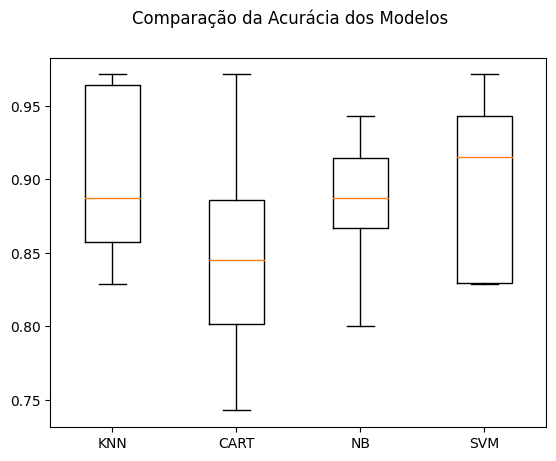

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Na comparação da acurácia, verificamos que o algoritmo KNN foi o que apresentou a melhor média. Os demais algoritmos apresentaram, também, resultados próximos do resultado alcançado pelo KNN. Entendemos que isso seja devido à classe usada como target, uma vez que ela só apresenta dois valores possíveis.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = KNeighborsClassifier() # KNN
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.875


Considerando o cenário com todo o conjunto de teste, e testando somente com o algoritmo KNN vimos que a acurácia ficou menor do que a obtida com o algoritmo KNN na relação 80/20.
A título de experiência, para verificarmos se o algoritmo KNN é mesmo o mais indicado, vamos executar o mesmo cenário com os demais algoritmos.

In [ ]:
model = GaussianNB() # Naive Bayes
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9431818181818182


In [ ]:
model = SVC() # SVM
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.8977272727272727


In [ ]:
model = DecisionTreeClassifier() # CART
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.8068181818181818


Nas comparações com os demais algoritmos, no cenário de teste, sem validação cruzada, vimos que o algoritmo Naive Bayes apresentou uma acurácia de 0,94 contra os 0,90 alcançada pelo algoritmo KNN no cenário 80/20. Isso é um indicador de que, talvez, o algoritmo KNN não seja o de melhor desempenho.

ALGORITMOS DE MACHINE LEARNING PARA REGRESSÃO

Vamos usar o mesmo dataset anterior testado onde se buscou a acurácia, para desta vez, se buscar o tamanho do erro entre o estimador e a saída desejada.

LR: MSE 0.14 (0.06) - RMSE 0.37
Ridge: MSE 0.14 (0.06) - RMSE 0.37
Lasso: MSE 0.14 (0.06) - RMSE 0.37
KNN: MSE 0.08 (0.04) - RMSE 0.29
CART: MSE 0.15 (0.07) - RMSE 0.39
SVM: MSE 0.08 (0.03) - RMSE 0.28


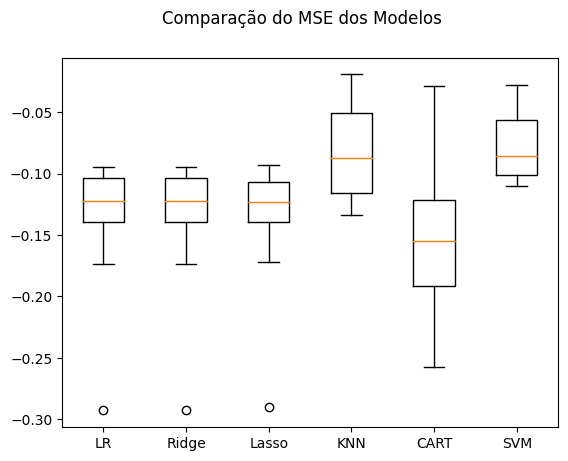

In [ ]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Para o caso dos problemas de Regressão (estimação) estamos buscando o erro. Assim, o melhor resultado deve ser aquele que possua o menor erro. Nos gráficos gerados, os melhores algoritmos são aqueles que apresentam os menores resultados. Assim, entendemos que o SVM apresentou o menor erro. Em que pese o KNN ter apresentado um MSE igual (estamos trabalhando com duas casas decimais) ao do SVM o RMSE deste é menor do que o daquele.

Vamos seguir com a mesma estratégia aplicada para os algoritmos de classificação.
Iremos testar o SVM e o KNN no cenário com todo o conjunto de treino para verificar seu desempenho.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = KNeighborsRegressor() # KNN
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.08
RMSE 0.29


In [ ]:
# Criando um modelo com todo o conjunto de treino
model = SVR() # SVM
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.07
RMSE 0.26


Nesta nova rodada de testes, o SVM se mostrou, novamente, mais adequado que o KNN. A escolha mais adequada sob a ótica dos problemas de regressão é o SVM.

Recursos Avançados Aplicados ao Aprendizado Supervisionado

LR: 0.880635 (0.043891)
KNN: 0.900873 (0.056632)
CART: 0.846905 (0.071538)
NB: 0.889286 (0.041005)
SVM: 0.897857 (0.058364)
Bagging: 0.903413 (0.071217)
RF: 0.912063 (0.069052)
ET: 0.909286 (0.063212)
Ada: 0.903492 (0.052717)
GB: 0.912063 (0.062864)
Voting: 0.897778 (0.057237)


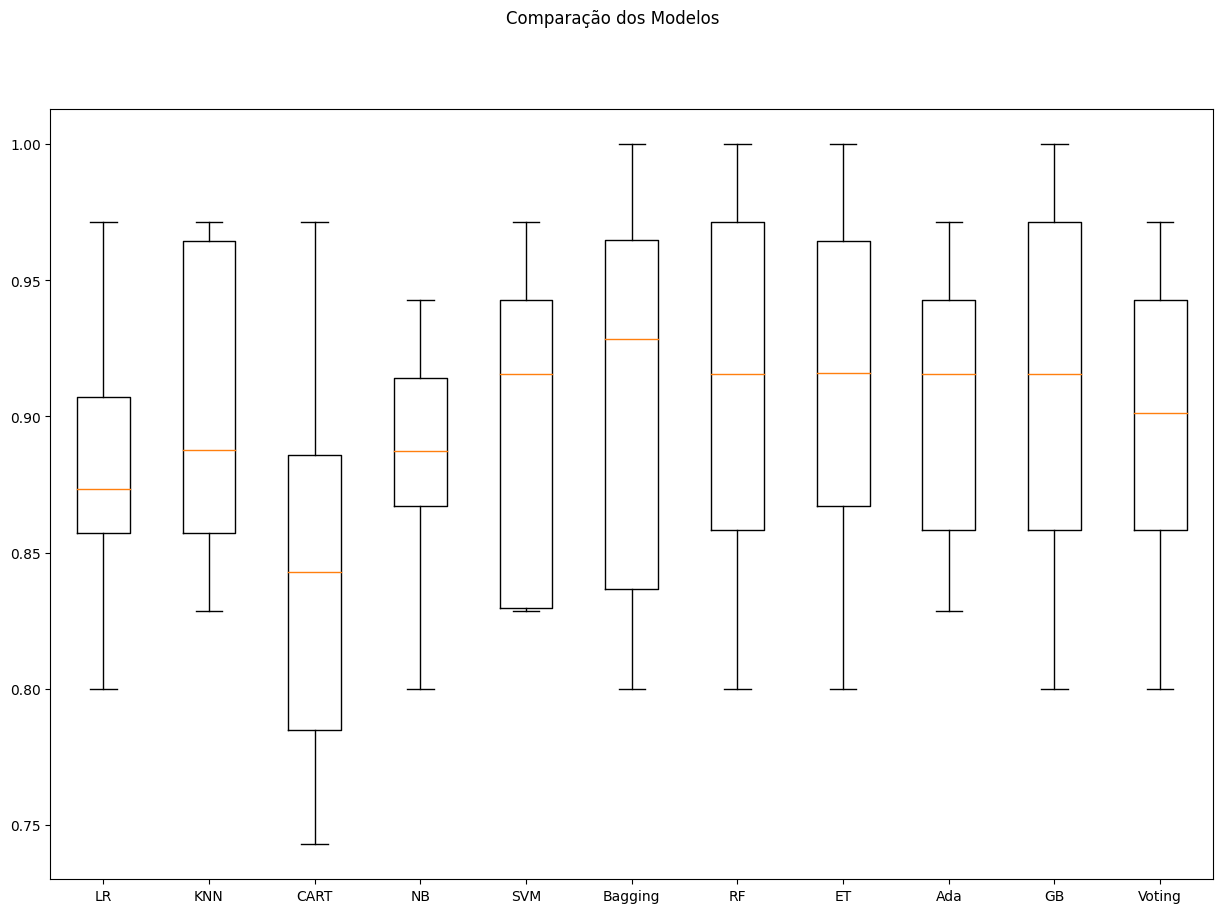

In [ ]:
# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Nesta nova simulação, temos que os algoritmos utilizados alcançaram resultados bem próximos. De qualquer forma, dentro de nossa análise, o algoritmo GB foi levemente superior. Embora tenha tido uma acurácia igual ao algoritmo RF, seu desvio padrão foi menor.

Criação e avaliação de modelos: dados padronizados e normalizados

Vamos executar os modelos abaixo, utilizando Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original,

LR-orig: 0.881 (0.044)
KNN-orig: 0.901 (0.057)
CART-orig: 0.847 (0.073)
NB-orig: 0.889 (0.041)
SVM-orig: 0.898 (0.058)
Bag-orig: 0.909 (0.069)
RF-orig: 0.915 (0.067)
ET-orig: 0.909 (0.063)
Ada-orig: 0.903 (0.053)
GB-orig: 0.912 (0.064)
Vot-orig: 0.895 (0.056)
LR-padr: 0.898 (0.048)
KNN-padr: 0.895 (0.057)
CART-padr: 0.852 (0.075)
NB-padr: 0.889 (0.041)
SVM-padr: 0.912 (0.050)
Bag-padr: 0.906 (0.079)
RF-padr: 0.912 (0.069)
ET-padr: 0.909 (0.063)
Ada-padr: 0.903 (0.053)
GB-padr: 0.912 (0.059)
Vot-padr: 0.909 (0.049)
LR-norm: 0.813 (0.069)
KNN-norm: 0.901 (0.057)
CART-norm: 0.847 (0.078)
NB-norm: 0.889 (0.041)
SVM-norm: 0.875 (0.050)
Bag-norm: 0.909 (0.072)
RF-norm: 0.918 (0.068)
ET-norm: 0.915 (0.061)
Ada-norm: 0.903 (0.053)
GB-norm: 0.909 (0.061)
Vot-norm: 0.870 (0.064)


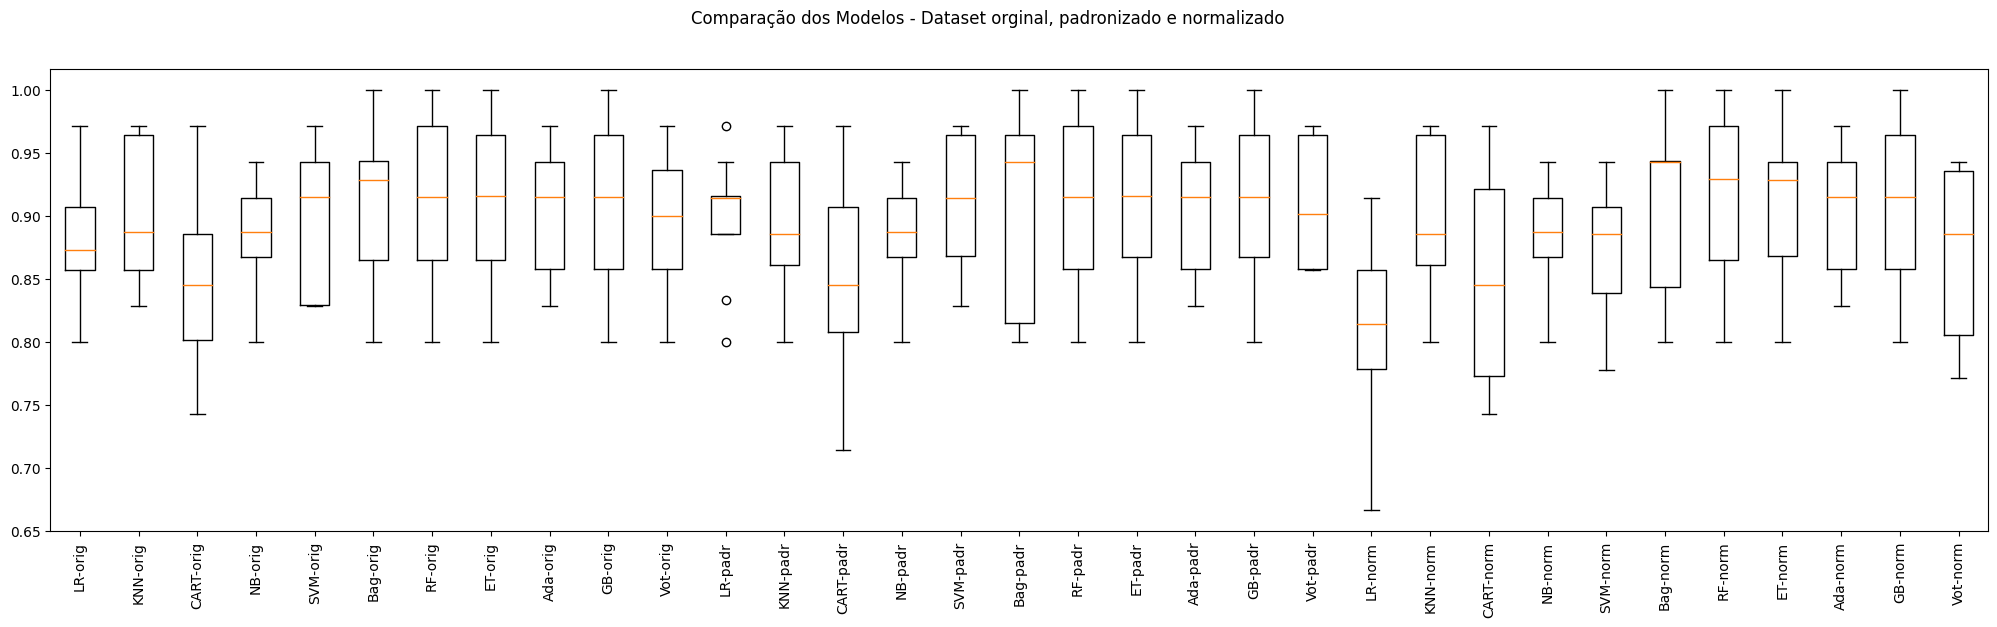

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Dentre os valores obtidos, o que apresentou o melhor resultado foi o algoritmo Random Forest que é um ensemble do tipo Bagging. Seu resultado com o conjunto original obteve uma acurácia de 0,915. Contudo quando aplicado aos dados normalizados, conseguiu alcançar um resultado ainda melhor: 0,918.
Conforme explicado pela profa. Escovedo, há inúmeras possibilidades, ainda abertas, para se buscar um melhor resultado. Entendemos, que para o atual MVP, o resultado é satisfatório.

Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9090909090909091


Por meio do conjunto de teste, verificamos que alcançamos acurácia de 90,9% em dados não vistos. Esse resultado não foi melhor do que a nossa avaliação anterior do Random Forest, que alcançou acurácia média de 91,8% (conjunto normalizado).